In [1]:
import pandas as pd
import scipy as scipy
import sklearn
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import random
import operator
import math

In [32]:
df=pd.read_csv("pivotmatrix.csv",index_col='movieId')

In [33]:
df.head()

,54,58,91,156,208,245,251,294,298,359,...,13264,13345,13368,13383,13413,13453,13454,13494,13499,13543
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,5.0,4.0,5.0,4.0,0.0,4.0,4.5,4.0,5.0,...,4.0,4.0,0.0,0.0,0.0,4.0,0.0,3.5,4.0,0.0
2,0.0,0.0,3.5,5.0,0.0,0.0,4.0,4.5,0.0,0.0,...,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0


In [34]:
df.shape

(2822, 485)

In [35]:
tedf=df.iloc[2600: , : ]
#df.drop(df.columns[0], axis=1, inplace=True)
tedf.to_csv("TestUIMatrix.csv")
df=df.iloc[ :2600, : ]
print(df)
dft=df.T
tsidcol = list(dft.columns.values)
#df.drop(df.columns[0], axis=1, inplace=True)
print(df)

          54   58   91  156  208  245  251  294  298  359  ...  13264  13345  \
movieId                                                    ...                 
1        4.0  5.0  4.0  5.0  4.0  0.0  4.0  4.5  4.0  5.0  ...    4.0    4.0   
2        0.0  0.0  3.5  5.0  0.0  0.0  4.0  4.5  0.0  0.0  ...    0.0    3.5   
3        0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  ...    0.0    0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
5        0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...    0.0    0.0   
6        0.0  4.5  0.0  4.0  0.0  0.0  0.0  3.5  5.0  5.0  ...    4.5    3.5   
7        0.0  0.0  0.0  4.0  0.0  0.0  5.0  0.0  0.0  0.0  ...    0.0    0.0   
8        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
9        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
10       4.0  0.0  4.0  4.0  0.0  0.0  0.0  3.5  4.0  4.0  ...    0.0    0.0   
11       5.0  4.5  4.0  5.0  0.0  0.0  5

In [36]:
# 1 min-max norm
def normalize(d) :
    x = d.values  # returns a numpy array
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return df
d=normalize(df) 
row_count=d.shape[0]
print(d)

      0    1    2    3    4    5    6    7    8    9    ...  475  476  477  \
0     0.8  1.0  0.8  1.0  0.8  0.0  0.8  0.9  0.8  1.0  ...  0.8  0.8  0.0   
1     0.0  0.0  0.7  1.0  0.0  0.0  0.8  0.9  0.0  0.0  ...  0.0  0.7  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.8  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5     0.0  0.9  0.0  0.8  0.0  0.0  0.0  0.7  1.0  1.0  ...  0.9  0.7  0.0   
6     0.0  0.0  0.0  0.8  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9     0.8  0.0  0.8  0.8  0.0  0.0  0.0  0.7  0.8  0.8  ...  0.0  0.0  0.0   
10    1.0  0.9  0.8  1.0  0.0  0.0  1.0  0.0  0.0  0.8  ...  0.0  0.0  0.0   
11    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.8  0.0  ...  0.0

[65409.39330877928, 62111.48191344715, 60781.79238154989, 59595.473778245665, 59009.94132415658, 58309.0043218116, 57592.38327569562, 57002.69652582691, 56285.168453230166, 55789.713646876524, 55243.574461416174, 54745.80299294881, 54317.26781108111, 53556.959049632365, 53258.89966677818, 52729.76764665441, 52172.02389550238, 51858.012390335025, 51365.52198648587, 50961.205270847524, 50682.30691212968, 50235.12177479102, 49876.24936435368, 49484.01979444614, 49186.287848750166, 48581.73028563281, 48313.79152526988, 47975.13233980249, 47538.05048149266, 47199.23212446853, 46721.47224418783, 46262.75755227931, 46056.67167898631, 45720.2483207735, 45414.85775492193, 45017.40298115229, 44738.74200755225, 44251.04873215864, 43990.96203898004, 43675.48609084163]


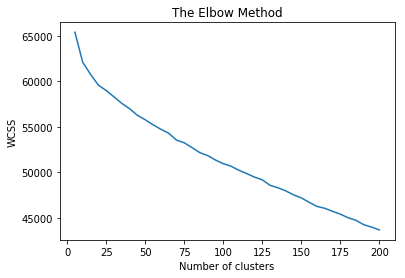

In [37]:
wcss = []
l=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200]
for i in range(5,201,5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(d)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(l, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [38]:
p1 = [5,wcss[0]]
p2 = [200,wcss[39]]
def line_eq(p1,p2):
    a=-1*(p2[1]-p1[1])/(p2[0]-p1[0])
    c=-1*(p1[1]-(a*(p1[0])))
    b=1
    l=[a,b,c]
    return l
line=line_eq(p1,p2)
def distance_to_line(p3):
    
    n=abs((line[0]*p3[0])+(line[1]*p3[1])+(line[2]))
    denom=((line[0]*line[0])+(line[1]*line[1]))**(1/2)
    dis=n/denom
    return dis

maxdis=0
j=0
k=0
for i in range(5,201,5):
    p = [i,wcss[j]]
    dis=distance_to_line(p)
    if dis>maxdis:
        maxdis=dis
        k=i
    j=j+1
print(k)


45


In [39]:
n=len(df)
MAX_ITER=25
m=1.7

def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat

def calculateClusterCenter(membership_mat):
    cluster_mem_val =zip(*membership_mat)
    cluster_centers = list()
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(0,n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
        #print("center",center)
        
    return cluster_centers

def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(map(operator.sub, x, cluster_centers[j])) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat


def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

def fuzzyCMeansClustering():
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    cluster_centers = calculateClusterCenter(membership_mat)
    #print("this is the matrix",membership_mat)
    mem_df=pd.DataFrame
    #print("\n")
    #print("clusterlabels", cluster_labels)
    #print("\n")
    #print("clustercenters", cluster_centers)
    return cluster_labels, cluster_centers, membership_mat

labels, centers, matrix = fuzzyCMeansClustering()

In [74]:
df["cluster number"]=labels

In [75]:
df['cluster number'].value_counts()

7     1245
19     217
9      149
32     105
33     104
2       92
29      64
39      55
5       55
0       38
24      35
31      31
43      29
13      27
17      25
44      25
12      24
11      22
4       22
8       19
36      19
42      18
34      17
35      16
18      16
1       15
6       14
25      14
21      13
20      13
27      12
15       9
41       9
16       8
38       6
40       4
3        4
23       3
37       3
26       2
30       2
Name: cluster number, dtype: int64

In [77]:
df.head()

,54,58,91,156,208,245,251,294,298,359,...,13345,13368,13383,13413,13453,13454,13494,13499,13543,cluster number
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,5.0,4.0,5.0,4.0,0.0,4.0,4.5,4.0,5.0,...,4.0,0.0,0.0,0.0,4.0,0.0,3.5,4.0,0.0,19
2,0.0,0.0,3.5,5.0,0.0,0.0,4.0,4.5,0.0,0.0,...,3.5,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,36
3,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,32


In [78]:
df.drop(columns='cluster number',inplace=True)

In [79]:
df.head()

,54,58,91,156,208,245,251,294,298,359,...,13264,13345,13368,13383,13413,13453,13454,13494,13499,13543
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,5.0,4.0,5.0,4.0,0.0,4.0,4.5,4.0,5.0,...,4.0,4.0,0.0,0.0,0.0,4.0,0.0,3.5,4.0,0.0
2,0.0,0.0,3.5,5.0,0.0,0.0,4.0,4.5,0.0,0.0,...,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0


evaluating nearest cluster for test data using manhattan distance

In [ ]:
import math
import random
import collections

def euclidean_distance(train,test) :    
    train = np.asarray(train)
    test = np.asarray(test)
    temp=train-test
    temp=[x**2 for x in temp]
    dist=np.sum(temp)dist=dist**(1/2)
    return dist

def evaluate_nearest(mv,test) :
    flag=[]
    print("euclidean distance")
    print(len(test))
    print(len(mv))
    for i in range (0,len(test)) :
        arr=[]
        for j in range (0,len(mv)):
            temp = euclidean_distance(test[i],mv[j])
            arr.append(temp)
        #print(arr)    
        arr=sorted(range(len(arr)),key=arr.__getitem__)
        f=arr[0]
        flag.append(f)
    return flag,f

cluster_number = []
x=[]
x=[tedf.iloc[i] for i in range(0,len(tedf))]
cluster_number=evaluate_nearest(centers,x)
print ('cluster_number',cluster_number)

In [110]:

def supremum_distance(train,test):
    k=0
    train = np.asarray(train)
    test = np.asarray(test)
    temp = train - test
    temp=np.absolute(temp)
    for i in temp:
        if i>k:
            k=i
    return k

def evaluate_nearest(mv,test) :
    flag=[]
   # print("supremum distance")
   # print(len(test))
   # print(len(mv))
    for i in range (0,len(test)) :
        arr=[]
        for j in range (0,len(mv)):
            temp = supremum_distance(test[i],mv[j])
            arr.append(temp)
        #print(arr)    
        arr=sorted(range(len(arr)),key=arr.__getitem__)
        f=arr[0]
        flag.append(f)
    return flag,f

cluster_number = []
x=[]
x=[tedf.iloc[i] for i in range(0,len(tedf))]
cluster_number=evaluate_nearest(centers,x)
print ('cluster_number',cluster_number)



('cluster_number', ([13, 19, 19, 29, 34, 19, 19, 44, 12, 19, 19, 19, 19, 19, 19, 21, 44, 23, 19, 19, 19, 19, 19, 19, 19, 39, 17, 35, 19, 40, 19, 8, 19, 19, 19, 19, 19, 19, 19, 19, 19, 44, 36, 19, 19, 34, 12, 44, 19, 4, 17, 19, 19, 16, 25, 4, 4, 4, 19, 19, 19, 27, 25, 19, 19, 19, 19, 19, 19, 19, 35, 19, 19, 19, 19, 27, 19, 19, 19, 19, 8, 34, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 44, 19, 19, 21, 19, 19, 19, 36, 19, 44, 19, 19, 19, 29, 19, 19, 12, 27, 18, 21, 36, 19, 19, 44, 19, 35, 12, 19, 19, 19, 37, 17, 18, 19, 34, 19, 25, 44, 19, 19, 19, 19, 19, 19, 19, 35, 19, 19, 19, 34, 19, 19, 35, 12, 19, 21, 2, 19, 19, 19, 34, 4, 19, 19, 19, 19, 27, 19, 19, 4, 19, 19, 34, 2, 19, 19, 19, 19, 19, 44, 19, 19, 19, 19, 12, 19, 19, 36, 19, 19, 19, 19, 39, 8, 19, 19, 4, 19, 19, 36, 19, 19, 19, 31, 19, 25, 25, 19, 19, 25, 21, 34, 34, 2, 23, 35, 12, 35, 19, 19, 12, 19, 19, 19], 19))


In [67]:

def manhattan_distance(train,test):
    train = np.asarray(train)
    test = np.asarray(test)
    temp = train - test
    temp=np.absolute(temp)
    d=np.sum(temp)
    return d

def evaluate_nearest(mv,test) :
    flag=[]
    print("manhattan distance")
    print(len(test))
    print(len(mv))
    for i in range (0,len(test)) :
        arr=[]
        for j in range (0,len(mv)):
            temp = manhattan_distance(test[i],mv[j])
            arr.append(temp)
        #print(arr)    
        arr=sorted(range(len(arr)),key=arr.__getitem__)
        f=arr[0]
        flag.append(f)
    return flag

cluster_number = []
x=[]
x=[tedf.iloc[i] for i in range(0,len(tedf))]
cluster_number=evaluate_nearest(centers,x)
print ('cluster_number',cluster_number)



manhattan distance
222
45
('cluster_number', [7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])


In [68]:
def cosine_similarity(train,test):
    train = np.asarray(train)
    test = np.asarray(test)
    temp=train * test
    d=np.sum(temp)
    train = [x**2 for x in train]
    d1 = np.sum(train)
    d1=d1**(1/2)
    test = [x**2 for x in test]
    d2=np.sum(test)
    d2=d2**(1/2)
    return d/(d1 * d2)

def evaluate_nearest(mv,test) :
    flag=[]
    print("cosine similarity")
    print(len(test))
    print(len(mv))
    for i in range (0,len(test)) :
        arr=[]
        for j in range (0,len(mv)):
            temp = cosine_similarity(test[i],mv[j])
            arr.append(temp)
        #print(arr)    
        arr=sorted(range(len(arr)),key=arr.__getitem__)
        f=arr[0]
        flag.append(f)
    return flag

cluster_number = []
x=[]
x=[tedf.iloc[i] for i in range(0,len(tedf))]
cluster_number=evaluate_nearest(centers,x)
print ('cluster_number',cluster_number)


cosine similarity
222
45
('cluster_number', [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])


In [108]:
def pearson_correlation(train,test) :
    train = np.asarray(train)
    test = np.asarray(test)
    n=train.size
    temp = train * test
    d=np.sum(temp)
    d1=np.sum(train)
    d2=np.sum(test)
    numerator = n*d-d1*d2
    train = [x ** 2 for x in train]
    d11 = np.sum(train)
    test = [x ** 2 for x in test]
    d21 = np.sum(test)
    denominator = (d11-(d1**2))*(d21-(d2**2))
    denominator =denominator ** 1/2
    return numerator/denominator

def evaluate_nearest(mv,test) :
    flag=[]
    print("pearson correlation")
    print(len(test))
    print(len(mv))
    for i in range (0,len(test)) :
        arr=[]
        for j in range (0,len(mv)):
            temp = pearson_correlation(test[i],mv[j])
            arr.append(temp)
        #print(arr)    
        arr=sorted(range(len(arr)),key=arr.__getitem__)
        f=arr[0]
        flag.append(f)
    return flag,f

cluster_number = []
x=[]
x=[tedf.iloc[i] for i in range(0,len(tedf))]
cluster_number=evaluate_nearest(centers,x)
print ('cluster_number',cluster_number)


pearson correlation
222
45


C:\Users\sirir\anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


('cluster_number', ([18, 19, 7, 19, 24, 19, 19, 0, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 7, 19, 0, 19, 19, 19, 19, 19, 19, 19, 7, 19, 19, 19, 19, 19, 19, 19, 7, 8, 19, 19, 19, 19, 7, 19, 0, 19, 19, 19, 0, 19, 0, 19, 0, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 32, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 7, 19, 19, 0, 19, 19, 19, 0, 19, 19, 19, 19, 19, 0, 19, 19, 19, 35, 7, 19, 0, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 7, 19, 19, 7, 19, 19, 19, 19, 0, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 0, 19, 19, 19, 19, 19, 19, 19, 19, 19, 31, 19, 19, 0, 19, 19, 19, 0, 19, 19, 19, 19, 7, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 0, 17, 19, 19, 0, 19, 19, 19, 19, 19, 19, 0, 19, 19, 19, 19, 12, 19, 0, 19, 19, 0, 19, 21, 19, 0, 4, 19, 19, 19, 19, 44], 44))


In [111]:
import collections
import math
import operator
clusters=[[] for y in range(45)]
def listtobinary(listpassed):
    temp=listpassed
    for i in range(0, len(temp)):
        if (temp[i] != 0):
            temp[i] = 1
    return temp

def song_20per(test):
    songs=[]
    twentypersong=[]
    temp=listtobinary(test)
    for i in range(len(temp)):
        if temp[i]==1:
            songs.append(i)
    length=len(songs)
    twentypercent=math.ceil(((length*20)/100))
    for i in range(int(twentypercent)):
        j=random.randint(0,(length-1))
        twentypersong.append(songs[j])
    return twentypersong

def knn_distance(cluster,testsongs):
    distance=[]
    diction={}
    for i in testsongs: 
        for j in cluster:
            set1=(i,j)
            st=dfdis.iloc[i]
            sc=dfdis.iloc[j]
            temp=supremum_distance(st,sc)
            diction[set1]=temp
    sorted_dict=sorted(diction.items(),key=operator.itemgetter(1))
    sorted_dict=dict(sorted_dict)
    #print(sorted_dict)
    return(sorted_dict)
all_recommend_songs=[]

for i in range(tedf.shape[0]):
    recommend_vector=[]
    k_knn=0 
    test=tedf.iloc[i]
    r=evaluate_nearest(centers,test)
    print(r[1])
    print(len(r))
    test1=df.iloc[i]
    test_20per_songs=song_20per(test1)
    x=knn_distance(clusters[r[1]],test_20per_songs)
    print(x)
    for k in x:
        if(k_knn!=300):
            print(recommend_vector)
            recommend_vector.append(k[0])
            recommend_vector.append(k[1])
            k_knn=k_knn+1
    recommend_vector=set(recommend_vector)
    recommend_vector=list(recommend_vector)
    print(recommend_vector)
    #print(recommend_vector)
    all_recommend_songs.append(recommend_vector)


7
2
{}
[]
19
2
{}
[]
19
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
19
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
19
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
19
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
19
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
19
2
{}
[]
7
2
{}
[]
19
2
{}
[]
19
2
{}
[]
7
2
{}
[]
7
2
{}
[]
19
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
19
2
{}
[]
19
2
{}
[]
19
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}
[]
7
2
{}


In [ ]:
('clusterlabels', [9, 3, 19, 32, 40, 19, 32, 32, 23, 32, 32, 12, 32, 19, 19, 11, 19, 19, 48, 48, 32, 32, 48, 22, 19, 32, 45, 21, 46, 17, 32, 39, 19, 32, 32, 14, 46, 32, 32, 31, 15, 14, 46, 31, 47, 19, 48, 32, 32, 0, 22, 32, 19, 4, 32, 47, 32, 32, 30, 31, 32, 37, 19, 32, 32, 22, 15, 32, 3, 1, 32, 15, 19, 32, 32, 32, 32, 32, 32, 19, 32, 32, 32, 32, 19, 32, 23, 19, 6, 31, 32, 2, 32, 32, 32, 32, 43, 45, 3, 9, 32, 19, 32, 32, 19, 32, 39, 23, 32, 32, 23, 19, 39, 19, 19, 19, 32, 32, 32, 32, 32, 32, 32, 41, 32, 29, 48, 32, 32, 36, 32, 32, 32, 47, 32, 32, 32, 19, 32, 31, 19, 32, 32, 39, 6, 48, 32, 4, 32, 14, 48, 19, 32, 16, 48, 32, 19, 47, 34, 48, 32, 32, 21, 32, 32, 23, 22, 31, 32, 19, 4, 3, 32, 32, 17, 32, 32, 3, 32, 31, 41, 32, 32, 43, 32, 32, 48, 32, 26, 32, 19, 39, 39, 32, 32, 32, 32, 41, 39, 39, 32, 46, 22, 19, 43, 39, 32, 36, 32, 32, 39, 32, 32, 11, 23, 26, 32, 32, 32, 29, 47, 9, 2, 32, 39, 47, 32, 4, 14, 19, 32, 32, 8, 32, 32, 19, 48, 32, 36, 32, 32, 47, 15, 32, 12, 19, 14, 32, 32, 39, 22, 39, 19, 32, 32, 19, 32, 32, 23, 48, 32, 19, 48, 32, 32, 32, 32, 19, 32, 44, 32, 32, 19, 5, 21, 48, 31, 32, 32, 32, 23, 47, 19, 3, 39, 48, 32, 28, 44, 32, 48, 32, 32, 29, 43, 48, 32, 48, 39, 15, 43, 32, 32, 46, 32, 32, 32, 32, 19, 47, 39, 32, 32, 32, 32, 32, 32, 32, 48, 36, 40, 32, 32, 32, 15, 22, 48, 48, 14, 32, 14, 32, 32, 32, 32, 32, 32, 32, 3, 31, 32, 39, 3, 22, 6, 32, 39, 2, 19, 19, 32, 19, 32, 40, 19, 32, 12, 3, 32, 26, 7, 19, 32, 3, 32, 19, 32, 32, 48, 19, 14, 48, 4, 32, 21, 32, 6, 48, 32, 32, 32, 39, 32, 32, 22, 48, 3, 48, 32, 32, 38, 22, 14, 21, 40, 47, 44, 32, 32, 22, 23, 32, 32, 32, 31, 26, 31, 32, 39, 19, 39, 32, 32, 32, 31, 6, 32, 32, 19, 41, 32, 32, 32, 32, 32, 32, 32, 32, 10, 31, 32, 48, 32, 32, 32, 32, 32, 48, 19, 32, 31, 32, 43, 12, 32, 19, 27, 49, 32, 32, 32, 2, 3, 32, 47, 14, 19, 35, 47, 32, 32, 32, 32, 32, 36, 32, 32, 45, 17, 19, 40, 48, 32, 32, 3, 43, 32, 3, 32, 14, 22, 32, 32, 17, 32, 31, 19, 48, 6, 32, 22, 36, 32, 32, 6, 32, 32, 22, 31, 48, 26, 32, 48, 32, 32, 32, 31, 14, 39, 32, 32, 32, 32, 47, 32, 14, 5, 32, 32, 32, 6, 3, 28, 32, 3, 32, 46, 32, 32, 47, 32, 22, 32, 32, 32, 19, 23, 32, 48, 47, 47, 41, 32, 32, 32, 3, 32, 32, 32, 19, 31, 32, 32, 19, 3, 31, 32, 45, 23, 41, 32, 3, 32, 32, 32, 32, 19, 39, 32, 32, 32, 48, 35, 32, 19, 32, 32, 32, 48, 32, 10, 49, 32, 19, 12, 39, 19, 32, 19, 32, 6, 19, 32, 32, 26, 46, 32, 39, 19, 48, 23, 32, 32, 19, 32, 32, 32, 32, 39, 32, 32, 32, 12, 19, 32, 32, 19, 19, 32, 47, 23, 48, 48, 14, 45, 3, 32, 32, 28, 32, 32, 19, 9, 19, 48, 4, 32, 47, 32, 48, 19, 36, 19, 32, 22, 32, 22, 32, 19, 46, 32, 32, 32, 32, 35, 37, 32, 32, 19, 14, 43, 32, 32, 32, 19, 32, 47, 32, 32, 32, 32, 32, 32, 23, 7, 22, 22, 32, 32, 2, 23, 6, 32, 32, 32, 32, 32, 47, 44, 32, 40, 30, 32, 31, 32, 32, 32, 32, 32, 39, 32, 32, 22, 32, 32, 45, 19, 32, 32, 19, 19, 46, 39, 0, 32, 47, 35, 14, 39, 32, 39, 32, 32, 32, 32, 19, 40, 32, 32, 44, 9, 47, 19, 32, 32, 23, 32, 32, 32, 19, 43, 32, 32, 48, 46, 19, 39, 32, 32, 19, 32, 19, 32, 32, 22, 32, 32, 19, 19, 32, 32, 32, 31, 23, 19, 32, 39, 48, 4, 48, 19, 48, 39, 47, 32, 32, 39, 31, 32, 47, 19, 32, 32, 32, 32, 32, 3, 5, 32, 32, 32, 17, 17, 26, 31, 17, 32, 39, 23, 0, 39, 11, 32, 32, 32, 32, 32, 48, 39, 32, 32, 31, 32, 40, 23, 48, 32, 32, 22, 31, 43, 19, 14, 32, 32, 39, 32, 32, 32, 19, 44, 14, 32, 32, 32, 31, 31, 39, 32, 32, 32, 48, 32, 32, 39, 3, 23, 32, 32, 3, 0, 32, 32, 32, 32, 23, 32, 1, 32, 19, 36, 32, 12, 26, 48, 3, 19, 44, 31, 48, 32, 19, 19, 32, 24, 4, 23, 19, 32, 1, 45, 32, 19, 30, 19, 47, 32, 48, 32, 32, 19, 19, 48, 32, 32, 32, 32, 31, 32, 22, 32, 48, 32, 32, 15, 43, 16, 32, 3, 32, 48, 9, 32, 19, 32, 35, 32, 32, 31, 39, 32, 32, 49, 39, 32, 32, 31, 32, 32, 32, 19, 23, 32, 32, 13, 32, 32, 31, 32, 32, 48, 48, 32, 32, 32, 32, 32, 7, 44, 14, 32, 32, 32, 39, 32, 32, 48, 12, 32, 19, 31, 32, 29, 32, 19, 32, 19, 17, 32, 19, 31, 32, 32, 32, 14, 4, 39, 48, 32, 32, 32, 32, 48, 32, 32, 32, 34, 32, 32, 32, 17, 19, 31, 22, 32, 28, 31, 48, 32, 32, 32, 32, 32, 32, 47, 32, 34, 19, 5, 32, 46, 15, 32, 43, 32, 5, 32, 7, 19, 32, 48, 32, 32, 32, 31, 32, 19, 48, 32, 19, 48, 48, 32, 39, 19, 22, 32, 33, 7, 19, 19, 6, 32, 32, 32, 32, 32, 29, 32, 32, 39, 49, 32, 32, 48, 48, 32, 12, 32, 32, 32, 32, 32, 19, 32, 32, 32, 47, 32, 17, 32, 45, 31, 32, 32, 32, 1, 32, 32, 32, 32, 32, 32, 32, 19, 19, 0, 32, 22, 32, 32, 3, 32, 3, 47, 16, 32, 32, 32, 32, 32, 48, 32, 48, 32, 32, 48, 31, 48, 31, 31, 32, 32, 28, 31, 32, 32, 48, 32, 32, 32, 32, 32, 3, 19, 15, 48, 32, 48, 48, 32, 23, 31, 7, 32, 32, 32, 32, 12, 32, 32, 32, 32, 32, 32, 32, 32, 26, 40, 32, 40, 32, 32, 5, 32, 26, 32, 32, 32, 48, 39, 31, 32, 32, 17, 32, 22, 32, 26, 32, 32, 32, 32, 32, 6, 3, 21, 32, 47, 47, 48, 3, 49, 9, 32, 19, 14, 32, 32, 32, 32, 48, 19, 48, 32, 32, 32, 32, 32, 32, 7, 39, 19, 19, 31, 32, 3, 41, 32, 32, 9, 48, 36, 32, 3, 48, 32, 3, 32, 32, 32, 32, 32, 17, 19, 32, 40, 32, 23, 32, 32, 32, 32, 32, 32, 32, 0, 33, 32, 32, 39, 27, 32, 3, 23, 30, 19, 44, 44, 32, 19, 14, 32, 32, 10, 19, 5, 32, 32, 32, 32, 32, 32, 6, 32, 23, 32, 32, 5, 32, 39, 34, 39, 32, 3, 32, 32, 47, 32, 32, 15, 39, 48, 19, 47, 31, 15, 21, 19, 19, 32, 32, 32, 32, 32, 19, 32, 23, 19, 47, 3, 14, 3, 19, 32, 3, 19, 19, 17, 48, 14, 32, 32, 31, 9, 32, 3, 32, 23, 48, 32, 32, 6, 31, 19, 19, 32, 32, 19, 23, 32, 1, 9, 32, 23, 32, 32, 32, 32, 32, 46, 32, 32, 19, 19, 32, 19, 23, 47, 32, 32, 12, 22, 32, 47, 32, 19, 32, 32, 9, 19, 47, 19, 32, 32, 48, 32, 48, 44, 32, 11, 48, 19, 32, 32, 32, 32, 19, 32, 23, 32, 45, 14, 32, 49, 32, 47, 31, 19, 32, 32, 32, 32, 32, 32, 12, 14, 32, 32, 14, 32, 32, 31, 32, 32, 19, 32, 32, 3, 32, 32, 11, 31, 9, 5, 15, 32, 32, 32, 32, 15, 32, 32, 32, 5, 6, 32, 19, 32, 26, 32, 32, 19, 32, 32, 19, 47, 32, 23, 32, 47, 31, 31, 47, 39, 32, 48, 17, 47, 32, 31, 23, 32, 31, 32, 21, 31, 32, 32, 32, 0, 3, 31, 32, 32, 32, 10, 48, 32, 26, 17, 31, 32, 12, 23, 48, 32, 32, 48, 15, 32, 32, 32, 19, 19, 32, 23, 31, 19, 32, 31, 32, 23, 19, 32, 32, 32, 32, 32, 32, 13, 32, 9, 32, 5, 19, 32, 22, 14, 1, 32, 32, 32, 19, 19, 17, 22, 32, 14, 32, 19, 32, 32, 32, 32, 39, 32, 47, 32, 21, 44, 32, 32, 32, 32, 32, 32, 39, 32, 32, 48, 32, 23, 32, 48, 34, 32, 48, 32, 32, 5, 32, 32, 47, 48, 48, 22, 3, 29, 32, 19, 39, 32, 32, 32, 3, 28, 39, 28, 32, 32, 32, 19, 36, 48, 32, 32, 31, 15, 23, 32, 12, 32, 47, 32, 32, 19, 32, 39, 32, 29, 39, 40, 12, 32, 9, 14, 32, 22, 32, 32, 6, 21, 48, 40, 32, 14, 32, 23, 32, 32, 19, 9, 6, 22, 13, 15, 47, 32, 32, 32, 32, 31, 19, 32, 32, 32, 26, 19, 32, 26, 32, 17, 32, 32, 47, 49, 39, 32, 32, 32, 47, 19, 32, 31, 0, 43, 39, 32, 32, 32, 32, 21, 48, 32, 32, 3, 48, 22, 32, 31, 32, 32, 32, 32, 32, 48, 32, 32, 32, 43, 32, 32, 32, 32, 32, 32, 31, 19, 32, 48, 44, 48, 6, 32, 27, 32, 32, 32, 43, 32, 48, 32, 32, 15, 48, 32, 32, 19, 31, 19, 23, 32, 32, 32, 14, 32, 32, 5, 32, 19, 32, 22, 32, 32, 32, 47, 32, 9, 32, 41, 32, 32, 32, 48, 9, 32, 32, 32, 48, 5, 19, 36, 32, 23, 32, 32, 19, 3, 49, 32, 23, 32, 48, 23, 32, 48, 32, 31, 39, 32, 32, 26, 32, 32, 47, 32, 32, 32, 26, 19, 48, 48, 32, 32, 19, 32, 32, 32, 14, 26, 14, 41, 32, 32, 32, 32, 32, 31, 32, 32, 26, 26, 14, 14, 32, 32, 39, 34, 14, 48, 32, 32, 17, 48, 41, 43, 26, 21, 48, 32, 48, 32, 32, 1, 19, 1, 32, 32, 32, 48, 32, 45, 32, 23, 15, 32, 2, 32, 32, 32, 32, 32, 32, 19, 3, 32, 44, 3, 32, 32, 32, 13, 47, 3, 32, 32, 32, 32, 32, 32, 6, 32, 48, 47, 32, 32, 47, 32, 5, 31, 32, 47, 32, 32, 12, 32, 32, 14, 48, 19, 39, 32, 39, 19, 32, 32, 15, 48, 32, 47, 32, 19, 2, 31, 19, 32, 19, 48, 47, 12, 32, 15, 19, 32, 32, 32, 39, 32, 48, 48, 46, 23, 39, 32, 14, 23, 28, 17, 32, 32, 39, 47, 19, 32, 32, 19, 32, 26, 32, 47, 32, 39, 39, 23, 32, 32, 22, 19, 6, 32, 49, 36, 15, 4, 48, 19, 32, 32, 32, 14, 31, 47, 32, 34, 19, 0, 32, 15, 32, 32, 48, 32, 32, 32, 48, 32, 32, 48, 22, 19, 14, 32, 39, 29, 32, 32, 26, 32, 32, 32, 32, 6, 41, 48, 32, 32, 43, 48, 3, 32, 47, 23, 13, 32])
